##**GIFT-COFB Encryption**##

In [1]:
#sub-cell
def subcell(S):
  S[1]=bin(int(S[1],2)^(int(S[0],2) & int(S[2],2)))[2:].zfill(32)
  S[0]=bin(int(S[0],2)^(int(S[1],2) & int(S[3],2)))[2:].zfill(32)
  S[2]=bin(int(S[2],2)^(int(S[0],2) | int(S[1],2)))[2:].zfill(32)
  S[3]=bin(int(S[3],2)^int(S[2],2))[2:].zfill(32)
  S[1]=bin(int(S[1],2) ^ int(S[3],2))[2:].zfill(32)
  S[3] = bin(int(S[3],2) ^ 0xFFFFFFFF)[2:].zfill(32)
  S[2]=bin(int(S[2],2) ^(int(S[0],2) & int(S[1],2)))[2:].zfill(32)
  S[0]=S[3]
  S[1]=S[1]
  S[2]=S[2]
  S[3]=S[0]
  return S

#perm-bits
def permbits(S):
  b0=[int(t) for t in S[0][::-1]]
  b1=[int(t) for t in S[1][::-1]]
  b2=[int(t) for t in S[2][::-1]]
  b3=[int(t) for t in S[3][::-1]]
  b=[]
  b.append(b0)
  b.append(b1)
  b.append(b2)
  b.append(b3)
  #print(b1)
  SP=[]
  for i in range(0,4):
    sp = [0 for _ in range(32)]
    for p_index, std_bits in enumerate(b[i]):
        sp[p[i][p_index]] = std_bits
    spp=[str(o) for o in sp[::-1]]
    spp="".join(spp)
    SP.append(spp)
  #print(SP)'''
  return SP

#addRoundKey
def addRoundKey(S,KS,i):
  #print(int(const[7],2))
  U=KS[6]+KS[7]
  V=KS[2]+KS[3]
  constt='000000'
  for z in range(0,i):
    c_bit=[int(i) for i in str(constt)]
    #print(c_bit)
    t=c_bit[0]
    c_bit[0]=c_bit[1]
    c_bit[1]=c_bit[2]
    c_bit[2]=c_bit[3]
    c_bit[3]=c_bit[4]
    c_bit[4]=c_bit[5]
    c_bit[5]=(t^c_bit[0])^1
    C=[str(o) for o in c_bit]
    constt="".join(C)
        
  c='10000000000000000000000000'+constt
  #print(int(U,2))
  #print(V) 
  S[1]=bin(int(S[1],2)^int(U,2))[2:].zfill(32)
  S[2]=bin(int(S[2],2)^int(V,2))[2:].zfill(32)
  S[3]=bin(int(S[3],2)^int(c,2))[2:].zfill(32)
  return S
  

#Key_update
def keyUpdate(KS):
  t1=KS[0]
  t2=KS[1]
  KS[0]=bin(int(KS[6],2)>>2)[2:].zfill(16)
  KS[1]=bin(int(KS[7],2)>>12)[2:].zfill(16)
  KS[7]=KS[5]
  KS[6]=KS[4]
  KS[5]=KS[3]
  KS[4]=KS[2]
  KS[3]=t2
  KS[2]=t1
  return KS
  #print(KS)


In [28]:
p0=[0,24,16,8,1,25,17,9,2,26,18,10,3,27,19,11,4,28,20,12,5,29,21,13,6,30,22,14,7,31,23,15]
p1=[8,0,24,16,9,1,25,17,10,2,26,18,11,3,27,19,12,4,28,20,13,5,29,21,14,6,30,22,15,7,31,23]
p2=[16,8,0,24,17,9,1,25,18,10,2,26,19,11,3,27,20,12,4,28,21,13,5,29,22,14,6,30,23,15,7,31]
p3=[24,16,8,0,25,17,9,1,26,18,10,2,27,19,11,3,28,20,12,4,29,21,13,5,30,22,14,6,31,23,15,7]
p=[]
p.append(p0)
p.append(p1)
p.append(p2)
p.append(p3)

#const=['000001','000011','000111','001111','011111','111110','111101','111011','110111','101111','011110','111100','111001','110011','100111','001110','011101','111010','110101','101011','010110','101100','011000','110000','100001','000010','000101','001011','010111','101110','011100','111000','110001','100011','000110','001101','011011','110110','101101','011010','110100','101001','010010','100100','001000','010001','100010','000100']
def encrypt(state,s_key):
  #print(f"Plain Text: {state} ; Key: {s_key}")
  
  #print(state)
  #initialize s0,s1,s2,s3
  bits=[int(t) for t in str(state)[::-1]]
  key=[int(t) for t in str(s_key)[::-1]]
  s0=[]
  s1=[]
  s2=[]
  s3=[]
  for i in range(0,128,4):
    #print(bits[i])
    s0.append(bits[i])
    s1.append(bits[i+1])
    s2.append(bits[i+2])
    s3.append(bits[i+3])
  jn1=[str(i) for i in s0[::-1]]
  jn2=[str(i) for i in s1[::-1]]
  jn3=[str(i) for i in s2[::-1]]
  jn4=[str(i) for i in s3[::-1]]
  S0="".join(jn1)
  S1="".join(jn2)
  S2="".join(jn3)
  S3="".join(jn4)
  S=[]
  S.append(S0)
  S.append(S1)
  S.append(S2)
  S.append(S3)
  #print(S)
  #initialize key
  w=[]
  #print(w)
  W=[]
  for i in range(0,128):
    if (i % 16==0 and i>15):
      #print("k")
      w.append(W)
      W=[]
    W.append(key[i])
  w.append(W)
  w=w[::-1]
  #print(w)
  KS=[]
  for j in range(0,8):
    k=[str(i) for i in w[j][::-1]]
    t="".join(k)  
    KS.append(t)
  #print(KS)
  for i in range(0,4):
    S=subcell(S)
    S=permbits(S)
    S=addRoundKey(S,KS,i)
    KS=keyUpdate(KS)
  #print(S)
  S[0]=S[0][::-1]
  S[1]=S[1][::-1]
  S[2]=S[2][::-1]
  S[3]=S[3][::-1]
  #print(S)
  g=[]
  for m in range(0,32):
    for l in range(0,4):
      g.append(S[l][m])
   # print(g)
  #print(g)    
  final="".join(g)
  #print(final)
  return int(final,2)

#encrypt(12800000000000000,164444444444444444)  


#**Generating Dataset**#

##*Wang's Differential*##

In [8]:
import numpy as np
import progressbar
import random

gift_diffs=[
                 0x70000000000000000000000000007000,
                 0x07000000000000000000000000000700,
                 0x00700000000000000000000000000070,
                 0x00070000000000000000000000000007,
]

def gift_dataset(rounds = 32, sample_size = 2**16, diff_class = 2):

    encrypted = []
    enc_class = []
    # list of 't' input differences
    # delta = [random.getrandbits(64) for i in range(diff_class)]
    delta = [gift_diffs[i] for i in range(diff_class)]
    #print(hex(delta[1]))
     
    # generating cipher differences
    for i in progressbar.progressbar(range(sample_size)):

        key = bin(random.getrandbits(128))[2:].zfill(128)
        plain = bin(random.getrandbits(128))[2:].zfill(128)
       
        # plain_text = str(eval(plain_opt+'(plain)'))[2:]
        cipher_text = encrypt(plain,key)

        # for each input difference, create a sample output difference
        for j in range(diff_class):
            p = bin(int(plain,2)^int(delta[j]))[2:].zfill(128)
            #print(p)
            c = encrypt(p,key)
            # convert the output difference to binary, padd with zeros, create it into a list of 64 bits, append into encrypted
            encrypted.append([int(i) for i in bin(c^cipher_text)[2:].zfill(128)])
            enc_class.append(j)

            
    return encrypted, enc_class, delta


key_bits = 128
rounds = 6
mod_plain_bit = 128
sample_size = 10000
diff_class = 4

ciphers, enc_class, delta = gift_dataset(rounds, sample_size, diff_class)

100% (10000 of 10000) |##################| Elapsed Time: 0:00:21 Time:  0:00:21


##*Random Differential*##

In [29]:
import numpy as np
import progressbar
import random
random_diffs=[
                 0x12340000004444000000000000007777,
                 0x37000234500000065436200000009876,
                 0x11110022220003333000044440000555,
                 0x77770067980000000000003456780007,
]

def random_dataset(rounds = 32, sample_size = 2**16, diff_class = 2):

    encrypted = []
    enc_class = []
    # list of 't' input differences
    # delta = [random.getrandbits(64) for i in range(diff_class)]
    delta = [random_diffs[i] for i in range(diff_class)]
    #print(hex(delta[1]))
     
    # generating cipher differences
    for i in progressbar.progressbar(range(sample_size)):

        key = bin(random.getrandbits(128))[2:].zfill(128)
        plain = bin(random.getrandbits(128))[2:].zfill(128)
       
        # plain_text = str(eval(plain_opt+'(plain)'))[2:]
        cipher_text = encrypt(plain,key)

        # for each input difference, create a sample output difference
        for j in range(diff_class):
            p = bin(int(plain,2)^int(delta[j]))[2:].zfill(128)
            #print(p)
            c = encrypt(p,key)
            # convert the output difference to binary, padd with zeros, create it into a list of 64 bits, append into encrypted
            encrypted.append([int(i) for i in bin(c^cipher_text)[2:].zfill(128)])
            enc_class.append(j)

            
    return encrypted, enc_class, delta


key_bits = 128
rounds = 6
mod_plain_bit = 128
sample_size = 10000
diff_class = 4

ciphers1, enc_class1, delta1 = random_dataset(rounds, sample_size, diff_class)

100% (10000 of 10000) |##################| Elapsed Time: 0:00:32 Time:  0:00:32


#**Model 1 --> Wang + Baksi**#

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on GPU")
else :
    device = torch.device("cpu")
    print("running on CPU")

# NN class
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(128,128)
        self.l2 = nn.Linear(128,1024)
        self.l3 = nn.Linear(1024,1024)

        self.f1 = nn.Linear(1024,diff_class)
    
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))

        x = self.f1(x)
        
        return F.softmax(x, dim=1)
    
net = Net().to(device)

# NN parameters
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

# converting dataset to tensors
X = torch.Tensor(ciphers)
y = torch.Tensor([np.eye(diff_class)[enc_class[i]] for i in range(len(enc_class))])

VAL_PCT = 0.3
val_size = int(len(X)*VAL_PCT)
# print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

# defining what to do in one iteration of data tensor throught the NN
def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs,y)
    
    if train:
        loss.backward()
        optimizer.step()
    
    return acc, loss


MODEL_NAME = f"GIFT_ML-Differential"

net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def test(size=32):
    
    random_start = np.random.randint(len(test_X)-size)
    X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,128).to(device),y.to(device))
    return val_acc, val_loss

# defining training method
def train():
    BATCH_SIZE = 200
    EPOCHS = 25
    with open(f"GIFT_round=6_wang_baski.log","w") as f:
        for epoch in progressbar.progressbar(range(EPOCHS)):
            for i in range(0,len(train_X), BATCH_SIZE):

                batch_X = train_X[i:i+BATCH_SIZE].view(-1,128).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)
                
                acc, loss = fwd_pass(batch_X, batch_y, train=True)
            
            if epoch%1 == 0:
                # Validating model
                random_start = np.random.randint(len(test_X)-BATCH_SIZE)
                X, y = test_X[random_start:random_start+BATCH_SIZE], test_y[random_start:random_start+BATCH_SIZE]
                with torch.no_grad():
                    val_acc, val_loss = fwd_pass(X.view(-1,128).to(device),y.to(device))

                # writing log file
                f.write(f"{MODEL_NAME},{epoch},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")
                
                print(f" Acc: {round(float(acc),2)}\t Loss: {round(float(loss),4)}\t Val_Acc: {round(float(val_acc),2)}\t Val_Loss: {round(float(val_loss),4)}")
    
    return val_acc

acc = train()

# checking for adequate accuracy

# tolerance value for equating the accuracy of training and testing phase
tol = 0.2/diff_class

# while True:
#     if (abs(acc - 1/diff_class) < tol):
#         print("\n\nRestarting due to insufficient accuracy...")
#         acc = train()
#     else:
#         print(f"\n\nTraining completed succesuccessfully with accuracy: {round(float(acc),2)}")
#         break

running on CPU


N/A% (0 of 25) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

GIFT_ML-Differential


  4% (1 of 25) |#                        | Elapsed Time: 0:00:05 ETA:   0:02:16

 Acc: 0.27	 Loss: 0.1876	 Val_Acc: 0.19	 Val_Loss: 0.1879


  8% (2 of 25) |##                       | Elapsed Time: 0:00:11 ETA:   0:02:10

 Acc: 0.28	 Loss: 0.1869	 Val_Acc: 0.23	 Val_Loss: 0.1879


 12% (3 of 25) |###                      | Elapsed Time: 0:00:17 ETA:   0:02:09

 Acc: 0.3	 Loss: 0.1852	 Val_Acc: 0.29	 Val_Loss: 0.1864


 16% (4 of 25) |####                     | Elapsed Time: 0:00:22 ETA:   0:01:58

 Acc: 0.35	 Loss: 0.184	 Val_Acc: 0.24	 Val_Loss: 0.1895


 20% (5 of 25) |#####                    | Elapsed Time: 0:00:29 ETA:   0:02:06

 Acc: 0.34	 Loss: 0.183	 Val_Acc: 0.24	 Val_Loss: 0.1903


 24% (6 of 25) |######                   | Elapsed Time: 0:00:36 ETA:   0:02:16

 Acc: 0.39	 Loss: 0.1794	 Val_Acc: 0.3	 Val_Loss: 0.1915


 28% (7 of 25) |#######                  | Elapsed Time: 0:00:43 ETA:   0:02:03

 Acc: 0.41	 Loss: 0.176	 Val_Acc: 0.28	 Val_Loss: 0.1918


 32% (8 of 25) |########                 | Elapsed Time: 0:00:50 ETA:   0:02:07

 Acc: 0.43	 Loss: 0.174	 Val_Acc: 0.25	 Val_Loss: 0.1944


 36% (9 of 25) |#########                | Elapsed Time: 0:00:57 ETA:   0:01:51

 Acc: 0.44	 Loss: 0.1701	 Val_Acc: 0.25	 Val_Loss: 0.1997


 40% (10 of 25) |#########               | Elapsed Time: 0:01:04 ETA:   0:01:46

 Acc: 0.46	 Loss: 0.1679	 Val_Acc: 0.23	 Val_Loss: 0.2039


 44% (11 of 25) |##########              | Elapsed Time: 0:01:11 ETA:   0:01:33

 Acc: 0.49	 Loss: 0.1592	 Val_Acc: 0.2	 Val_Loss: 0.2211


 48% (12 of 25) |###########             | Elapsed Time: 0:01:17 ETA:   0:01:24

 Acc: 0.58	 Loss: 0.1441	 Val_Acc: 0.29	 Val_Loss: 0.2123


 52% (13 of 25) |############            | Elapsed Time: 0:01:24 ETA:   0:01:21

 Acc: 0.59	 Loss: 0.1361	 Val_Acc: 0.23	 Val_Loss: 0.242


 56% (14 of 25) |#############           | Elapsed Time: 0:01:31 ETA:   0:01:16

 Acc: 0.55	 Loss: 0.1393	 Val_Acc: 0.26	 Val_Loss: 0.2339


 60% (15 of 25) |##############          | Elapsed Time: 0:01:38 ETA:   0:01:10

 Acc: 0.62	 Loss: 0.1245	 Val_Acc: 0.28	 Val_Loss: 0.2409


 64% (16 of 25) |###############         | Elapsed Time: 0:01:45 ETA:   0:01:02

 Acc: 0.6	 Loss: 0.1284	 Val_Acc: 0.25	 Val_Loss: 0.2277


 68% (17 of 25) |################        | Elapsed Time: 0:01:52 ETA:   0:00:54

 Acc: 0.69	 Loss: 0.1049	 Val_Acc: 0.21	 Val_Loss: 0.2537


 72% (18 of 25) |#################       | Elapsed Time: 0:01:59 ETA:   0:00:48

 Acc: 0.68	 Loss: 0.1096	 Val_Acc: 0.24	 Val_Loss: 0.2524


 76% (19 of 25) |##################      | Elapsed Time: 0:02:06 ETA:   0:00:41

 Acc: 0.76	 Loss: 0.0926	 Val_Acc: 0.23	 Val_Loss: 0.2573


 80% (20 of 25) |###################     | Elapsed Time: 0:02:13 ETA:   0:00:34

 Acc: 0.78	 Loss: 0.0804	 Val_Acc: 0.23	 Val_Loss: 0.2533


 84% (21 of 25) |####################    | Elapsed Time: 0:02:20 ETA:   0:00:28

 Acc: 0.77	 Loss: 0.0794	 Val_Acc: 0.25	 Val_Loss: 0.2618


 88% (22 of 25) |#####################   | Elapsed Time: 0:02:26 ETA:   0:00:19

 Acc: 0.82	 Loss: 0.0696	 Val_Acc: 0.25	 Val_Loss: 0.2615


 92% (23 of 25) |######################  | Elapsed Time: 0:02:33 ETA:   0:00:13

 Acc: 0.86	 Loss: 0.0554	 Val_Acc: 0.28	 Val_Loss: 0.2541


 96% (24 of 25) |####################### | Elapsed Time: 0:02:40 ETA:   0:00:06

 Acc: 0.81	 Loss: 0.0652	 Val_Acc: 0.29	 Val_Loss: 0.2545


100% (25 of 25) |########################| Elapsed Time: 0:02:46 Time:  0:02:46


 Acc: 0.92	 Loss: 0.0416	 Val_Acc: 0.24	 Val_Loss: 0.2647


Number of difference classes used: 4
Used dataset: 1 | Predicted dataset: 1
Acc: 0.245 | Val_acc: 0.2514
Success!







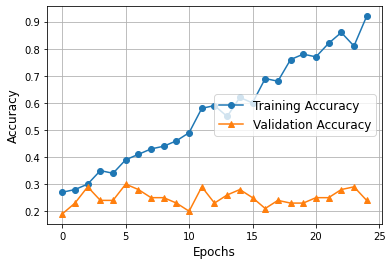

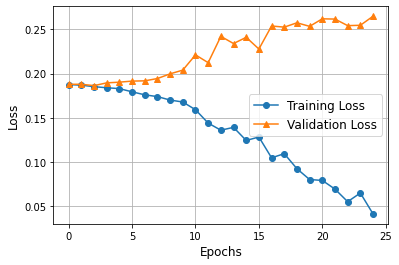

In [ ]:

# creating random test sample
test_X_r = []
test_y_r = []
for i in range(len(test_X)):
    test_X_r.append(np.random.randint(0,2,128))
    test_y_r.append(np.eye(diff_class)[np.random.randint(0,diff_class)])

test_X_r = torch.tensor(test_X_r)
test_y_r = torch.tensor(test_y_r)

# randomly selecting 
random_test = np.random.randint(0,2)
random_test = 1
if (random_test):
    X, y = test_X, test_y
else:
    X, y = test_X_r, test_y_r

with torch.no_grad():
    outputs = net(X.view(-1,128).to(device).float())
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y.to(device))]
    val_acc = matches.count(True)/len(matches)
    # val_acc, val_loss = fwd_pass(X.view(-1,64).to(device),y.to(device))

if (acc-val_acc <= tol):
    pred = 1
else:
    pred = 0

#print(f'Round reduced PRESENT to {rounds} rounds...')
print(f'Number of difference classes used: {diff_class}')
#print(f'PRESENT CIPHER = 1 | RANDOM = 0')
print(f'Used dataset: {random_test} | Predicted dataset: {pred}')
print(f'Acc: {round(float(acc),4)} | Val_acc: {round(float(val_acc),4)}')
if (pred == random_test):
    print('Success!')
else:
    print('Failure!')

print(f'\n\n\n\n')


import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

def create_acc_loss_graph(model_name):
    contents = open(f"GIFT_round=6_wang_baski.log","r").read().split('\n')
    
    epochs = []
    accuracies = []
    losses = []
    
    val_accs = []
    val_losses = []
    
    for c in contents:
        if model_name in c:
            name, epoch, acc, loss, val_acc, val_loss = c.split(",")
            
            epochs.append(float(epoch))
            accuracies.append(float(acc))
            losses.append(float(loss))
            
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))
            
    fig = plt.figure()
    
    # ax1 = plt.subplot2grid((1,2), (0,0))
    # ax2 = plt.subplot2grid((1,2), (0,1), sharex = ax1)
    
    plt.plot(epochs, accuracies, '-o', label = "Training Accuracy")
    plt.plot(epochs, val_accs, '-^', label = "Validation Accuracy")
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epochs', fontsize=12)
    plt.legend(loc=5, prop={'size': 12})
    plt.grid()

    plt.savefig(f'Acc_r={6}_c={diff_class}.png', dpi=360)

    fig = plt.figure()
    
    plt.plot(epochs, losses, '-o', label = "Training Loss")
    plt.plot(epochs, val_losses, '-^', label = "Validation Loss")
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epochs', fontsize=12)
    plt.legend(loc=5, prop={'size': 12})
    plt.grid()

    plt.savefig(f'Loss_r={6}_c={diff_class}.png', dpi=360)
    
    plt.show()

# model_name = "PRESENT-1585941094"
model_name = MODEL_NAME

create_acc_loss_graph(model_name)

#**Model 2 --> Wang + Our**#

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on GPU")
else :
    device = torch.device("cpu")
    print("running on CPU")

# NN class
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(128,128)
        self.l2 = nn.Linear(128,1024)
        
        self.f1 = nn.Linear(1024,diff_class)
    
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        

        x = self.f1(x)
        
        return F.softmax(x, dim=1)
    
net = Net().to(device)

# NN parameters
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

# converting dataset to tensors
X = torch.Tensor(ciphers)
y = torch.Tensor([np.eye(diff_class)[enc_class[i]] for i in range(len(enc_class))])

VAL_PCT = 0.3
val_size = int(len(X)*VAL_PCT)
# print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

# defining what to do in one iteration of data tensor throught the NN
def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs,y)
    
    if train:
        loss.backward()
        optimizer.step()
    
    return acc, loss


MODEL_NAME = f"GIFT_ML-Differential"

net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def test(size=32):
    
    random_start = np.random.randint(len(test_X)-size)
    X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,128).to(device),y.to(device))
    return val_acc, val_loss

# defining training method
def train():
    BATCH_SIZE = 200
    EPOCHS = 25
    with open(f"GIFT_round=5_wang_our.log","w") as f:
        for epoch in progressbar.progressbar(range(EPOCHS)):
            for i in range(0,len(train_X), BATCH_SIZE):

                batch_X = train_X[i:i+BATCH_SIZE].view(-1,128).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)
                
                acc, loss = fwd_pass(batch_X, batch_y, train=True)
            
            if epoch%1 == 0:
                # Validating model
                random_start = np.random.randint(len(test_X)-BATCH_SIZE)
                X, y = test_X[random_start:random_start+BATCH_SIZE], test_y[random_start:random_start+BATCH_SIZE]
                with torch.no_grad():
                    val_acc, val_loss = fwd_pass(X.view(-1,128).to(device),y.to(device))

                # writing log file
                f.write(f"{MODEL_NAME},{epoch},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")
                
                print(f" Acc: {round(float(acc),2)}\t Loss: {round(float(loss),4)}\t Val_Acc: {round(float(val_acc),2)}\t Val_Loss: {round(float(val_loss),4)}")
    
    return val_acc

acc = train()

# checking for adequate accuracy

# tolerance value for equating the accuracy of training and testing phase
tol = 0.2/diff_class

running on CPU


N/A% (0 of 25) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

GIFT_ML-Differential


  4% (1 of 25) |#                        | Elapsed Time: 0:00:01 ETA:   0:00:31

 Acc: 0.28	 Loss: 0.1864	 Val_Acc: 0.28	 Val_Loss: 0.1861


  8% (2 of 25) |##                       | Elapsed Time: 0:00:02 ETA:   0:00:30

 Acc: 0.28	 Loss: 0.184	 Val_Acc: 0.27	 Val_Loss: 0.1853


 12% (3 of 25) |###                      | Elapsed Time: 0:00:04 ETA:   0:00:29

 Acc: 0.33	 Loss: 0.1796	 Val_Acc: 0.3	 Val_Loss: 0.1846


 16% (4 of 25) |####                     | Elapsed Time: 0:00:05 ETA:   0:00:28

 Acc: 0.39	 Loss: 0.1747	 Val_Acc: 0.29	 Val_Loss: 0.1888


 20% (5 of 25) |#####                    | Elapsed Time: 0:00:06 ETA:   0:00:27

 Acc: 0.41	 Loss: 0.1695	 Val_Acc: 0.28	 Val_Loss: 0.1877


 24% (6 of 25) |######                   | Elapsed Time: 0:00:08 ETA:   0:00:26

 Acc: 0.43	 Loss: 0.1663	 Val_Acc: 0.31	 Val_Loss: 0.1847


 28% (7 of 25) |#######                  | Elapsed Time: 0:00:09 ETA:   0:00:24

 Acc: 0.47	 Loss: 0.162	 Val_Acc: 0.28	 Val_Loss: 0.1953


 32% (8 of 25) |########                 | Elapsed Time: 0:00:10 ETA:   0:00:23

 Acc: 0.51	 Loss: 0.1563	 Val_Acc: 0.29	 Val_Loss: 0.2016


 36% (9 of 25) |#########                | Elapsed Time: 0:00:12 ETA:   0:00:21

 Acc: 0.53	 Loss: 0.1478	 Val_Acc: 0.34	 Val_Loss: 0.195


 40% (10 of 25) |#########               | Elapsed Time: 0:00:13 ETA:   0:00:20

 Acc: 0.54	 Loss: 0.1443	 Val_Acc: 0.27	 Val_Loss: 0.2051


 44% (11 of 25) |##########              | Elapsed Time: 0:00:15 ETA:   0:00:19

 Acc: 0.58	 Loss: 0.1395	 Val_Acc: 0.27	 Val_Loss: 0.2113


 48% (12 of 25) |###########             | Elapsed Time: 0:00:16 ETA:   0:00:17

 Acc: 0.59	 Loss: 0.1351	 Val_Acc: 0.27	 Val_Loss: 0.2093


 52% (13 of 25) |############            | Elapsed Time: 0:00:17 ETA:   0:00:17

 Acc: 0.6	 Loss: 0.1331	 Val_Acc: 0.27	 Val_Loss: 0.2107


 56% (14 of 25) |#############           | Elapsed Time: 0:00:19 ETA:   0:00:15

 Acc: 0.6	 Loss: 0.1332	 Val_Acc: 0.32	 Val_Loss: 0.2165


 60% (15 of 25) |##############          | Elapsed Time: 0:00:20 ETA:   0:00:13

 Acc: 0.64	 Loss: 0.1304	 Val_Acc: 0.24	 Val_Loss: 0.2286


 64% (16 of 25) |###############         | Elapsed Time: 0:00:21 ETA:   0:00:12

 Acc: 0.64	 Loss: 0.1263	 Val_Acc: 0.33	 Val_Loss: 0.2116


 68% (17 of 25) |################        | Elapsed Time: 0:00:23 ETA:   0:00:10

 Acc: 0.62	 Loss: 0.1277	 Val_Acc: 0.32	 Val_Loss: 0.2151


 72% (18 of 25) |#################       | Elapsed Time: 0:00:24 ETA:   0:00:09

 Acc: 0.65	 Loss: 0.1222	 Val_Acc: 0.3	 Val_Loss: 0.2136


 76% (19 of 25) |##################      | Elapsed Time: 0:00:25 ETA:   0:00:07

 Acc: 0.68	 Loss: 0.1176	 Val_Acc: 0.3	 Val_Loss: 0.2184


 80% (20 of 25) |###################     | Elapsed Time: 0:00:27 ETA:   0:00:06

 Acc: 0.69	 Loss: 0.1149	 Val_Acc: 0.31	 Val_Loss: 0.2246


 84% (21 of 25) |####################    | Elapsed Time: 0:00:28 ETA:   0:00:05

 Acc: 0.69	 Loss: 0.1095	 Val_Acc: 0.24	 Val_Loss: 0.247


 88% (22 of 25) |#####################   | Elapsed Time: 0:00:29 ETA:   0:00:03

 Acc: 0.67	 Loss: 0.1132	 Val_Acc: 0.28	 Val_Loss: 0.2339


 92% (23 of 25) |######################  | Elapsed Time: 0:00:31 ETA:   0:00:02

 Acc: 0.62	 Loss: 0.132	 Val_Acc: 0.26	 Val_Loss: 0.2464


 96% (24 of 25) |####################### | Elapsed Time: 0:00:32 ETA:   0:00:01

 Acc: 0.69	 Loss: 0.1157	 Val_Acc: 0.33	 Val_Loss: 0.2348


100% (25 of 25) |########################| Elapsed Time: 0:00:33 Time:  0:00:33


 Acc: 0.69	 Loss: 0.1067	 Val_Acc: 0.29	 Val_Loss: 0.2497


In [ ]:
test_X_r = []
test_y_r = []
for i in range(len(test_X)):
    test_X_r.append(np.random.randint(0,2,128))
    test_y_r.append(np.eye(diff_class)[np.random.randint(0,diff_class)])

test_X_r = torch.tensor(test_X_r)
test_y_r = torch.tensor(test_y_r)

# randomly selecting 
random_test = np.random.randint(0,2)
random_test = 1
if (random_test):
    X, y = test_X, test_y
else:
    X, y = test_X_r, test_y_r

with torch.no_grad():
    outputs = net(X.view(-1,128).to(device).float())
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y.to(device))]
    val_acc = matches.count(True)/len(matches)
    # val_acc, val_loss = fwd_pass(X.view(-1,64).to(device),y.to(device))

if (acc-val_acc <= tol):
    pred = 1
else:
    pred = 0

#print(f'Round reduced PRESENT to {rounds} rounds...')
print(f'Number of difference classes used: {diff_class}')
#print(f'PRESENT CIPHER = 1 | RANDOM = 0')
print(f'Used dataset: {random_test} | Predicted dataset: {pred}')
print(f'Acc: {round(float(acc),4)} | Val_acc: {round(float(val_acc),4)}')
if (pred == random_test):
    print('Success!')
else:
    print('Failure!')

print(f'\n\n\n\n')


import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

def create_acc_loss_graph(model_name):
    contents = open(f"GIFT_round=5_wang_our.log","r").read().split('\n')
    
    epochs = []
    accuracies = []
    losses = []
    
    val_accs = []
    val_losses = []
    
    for c in contents:
        if model_name in c:
            name, epoch, acc, loss, val_acc, val_loss = c.split(",")
            
            epochs.append(float(epoch))
            accuracies.append(float(acc))
            losses.append(float(loss))
            
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))
            
    fig = plt.figure()
    
    # ax1 = plt.subplot2grid((1,2), (0,0))
    # ax2 = plt.subplot2grid((1,2), (0,1), sharex = ax1)
    
    plt.plot(epochs, accuracies, '-o', label = "Training Accuracy")
    plt.plot(epochs, val_accs, '-^', label = "Validation Accuracy")
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epochs', fontsize=12)
    plt.legend(loc=5, prop={'size': 12})
    plt.grid()

    plt.savefig(f'Acc2_r={5}_c={diff_class}.png', dpi=360)

    fig = plt.figure()
    
    plt.plot(epochs, losses, '-o', label = "Training Loss")
    plt.plot(epochs, val_losses, '-^', label = "Validation Loss")
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epochs', fontsize=12)
    plt.legend(loc=5, prop={'size': 12})
    plt.grid()

    plt.savefig(f'Loss2_r={5}_c={diff_class}.png', dpi=360)
    
    plt.show()

# model_name = "PRESENT-1585941094"
model_name = MODEL_NAME

create_acc_loss_graph(model_name)

#**Model 3 --> Random + Baksi**#

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on GPU")
else :
    device = torch.device("cpu")
    print("running on CPU")

# NN class
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(128,128)
        self.l2 = nn.Linear(128,1024)
        self.l3 = nn.Linear(1024,1024)

        self.f1 = nn.Linear(1024,diff_class)
    
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))

        x = self.f1(x)
        
        return F.softmax(x, dim=1)
    
net = Net().to(device)

# NN parameters
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

# converting dataset to tensors
X = torch.Tensor(ciphers1)
y = torch.Tensor([np.eye(diff_class)[enc_class1[i]] for i in range(len(enc_class1))])

VAL_PCT = 0.3
val_size = int(len(X)*VAL_PCT)
# print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

# defining what to do in one iteration of data tensor throught the NN
def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs,y)
    
    if train:
        loss.backward()
        optimizer.step()
    
    return acc, loss


MODEL_NAME = f"GIFT_ML-Differential"

net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def test(size=32):
    
    random_start = np.random.randint(len(test_X)-size)
    X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,128).to(device),y.to(device))
    return val_acc, val_loss

# defining training method
def train():
    BATCH_SIZE = 200
    EPOCHS = 25
    with open(f"GIFT_round=6_random_baski.log","w") as f:
        for epoch in progressbar.progressbar(range(EPOCHS)):
            for i in range(0,len(train_X), BATCH_SIZE):

                batch_X = train_X[i:i+BATCH_SIZE].view(-1,128).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)
                
                acc, loss = fwd_pass(batch_X, batch_y, train=True)
            
            if epoch%1 == 0:
                # Validating model
                random_start = np.random.randint(len(test_X)-BATCH_SIZE)
                X, y = test_X[random_start:random_start+BATCH_SIZE], test_y[random_start:random_start+BATCH_SIZE]
                with torch.no_grad():
                    val_acc, val_loss = fwd_pass(X.view(-1,128).to(device),y.to(device))

                # writing log file
                f.write(f"{MODEL_NAME},{epoch},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")
                
                print(f" Acc: {round(float(acc),2)}\t Loss: {round(float(loss),4)}\t Val_Acc: {round(float(val_acc),2)}\t Val_Loss: {round(float(val_loss),4)}")
    
    return val_acc

acc = train()

# checking for adequate accuracy

# tolerance value for equating the accuracy of training and testing phase
tol = 0.2/diff_class

# while True:
#     if (abs(acc - 1/diff_class) < tol):
#         print("\n\nRestarting due to insufficient accuracy...")
#         acc = train()
#     else:
#         print(f"\n\nTraining completed succesuccessfully with accuracy: {round(float(acc),2)}")
#         break

running on CPU


N/A% (0 of 25) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

GIFT_ML-Differential


  4% (1 of 25) |#                        | Elapsed Time: 0:00:05 ETA:   0:02:21

 Acc: 0.27	 Loss: 0.1875	 Val_Acc: 0.24	 Val_Loss: 0.1876


  8% (2 of 25) |##                       | Elapsed Time: 0:00:11 ETA:   0:02:15

 Acc: 0.24	 Loss: 0.1875	 Val_Acc: 0.27	 Val_Loss: 0.1878


 12% (3 of 25) |###                      | Elapsed Time: 0:00:17 ETA:   0:02:09

 Acc: 0.26	 Loss: 0.1873	 Val_Acc: 0.25	 Val_Loss: 0.1883


 16% (4 of 25) |####                     | Elapsed Time: 0:00:23 ETA:   0:02:04

 Acc: 0.33	 Loss: 0.1865	 Val_Acc: 0.24	 Val_Loss: 0.1885


 20% (5 of 25) |#####                    | Elapsed Time: 0:00:30 ETA:   0:02:13

 Acc: 0.31	 Loss: 0.1859	 Val_Acc: 0.28	 Val_Loss: 0.1875


 24% (6 of 25) |######                   | Elapsed Time: 0:00:37 ETA:   0:02:15

 Acc: 0.34	 Loss: 0.1846	 Val_Acc: 0.2	 Val_Loss: 0.1916


 28% (7 of 25) |#######                  | Elapsed Time: 0:00:44 ETA:   0:02:02

 Acc: 0.34	 Loss: 0.184	 Val_Acc: 0.27	 Val_Loss: 0.1892


 32% (8 of 25) |########                 | Elapsed Time: 0:00:51 ETA:   0:01:57

 Acc: 0.29	 Loss: 0.1843	 Val_Acc: 0.27	 Val_Loss: 0.188


 36% (9 of 25) |#########                | Elapsed Time: 0:00:58 ETA:   0:01:51

 Acc: 0.32	 Loss: 0.1831	 Val_Acc: 0.23	 Val_Loss: 0.1919


 40% (10 of 25) |#########               | Elapsed Time: 0:01:05 ETA:   0:01:45

 Acc: 0.28	 Loss: 0.1854	 Val_Acc: 0.2	 Val_Loss: 0.1938


 44% (11 of 25) |##########              | Elapsed Time: 0:01:12 ETA:   0:01:38

 Acc: 0.32	 Loss: 0.184	 Val_Acc: 0.24	 Val_Loss: 0.192


 48% (12 of 25) |###########             | Elapsed Time: 0:01:18 ETA:   0:01:29

 Acc: 0.34	 Loss: 0.1831	 Val_Acc: 0.27	 Val_Loss: 0.1895


 52% (13 of 25) |############            | Elapsed Time: 0:01:25 ETA:   0:01:23

 Acc: 0.34	 Loss: 0.1812	 Val_Acc: 0.28	 Val_Loss: 0.1917


 56% (14 of 25) |#############           | Elapsed Time: 0:01:32 ETA:   0:01:15

 Acc: 0.38	 Loss: 0.1791	 Val_Acc: 0.24	 Val_Loss: 0.1992


 60% (15 of 25) |##############          | Elapsed Time: 0:01:39 ETA:   0:01:08

 Acc: 0.45	 Loss: 0.1715	 Val_Acc: 0.23	 Val_Loss: 0.204


 64% (16 of 25) |###############         | Elapsed Time: 0:01:46 ETA:   0:01:01

 Acc: 0.49	 Loss: 0.1632	 Val_Acc: 0.21	 Val_Loss: 0.2091


 68% (17 of 25) |################        | Elapsed Time: 0:01:53 ETA:   0:00:54

 Acc: 0.55	 Loss: 0.1562	 Val_Acc: 0.21	 Val_Loss: 0.2192


 72% (18 of 25) |#################       | Elapsed Time: 0:02:00 ETA:   0:00:47

 Acc: 0.57	 Loss: 0.1418	 Val_Acc: 0.22	 Val_Loss: 0.2215


 76% (19 of 25) |##################      | Elapsed Time: 0:02:06 ETA:   0:00:39

 Acc: 0.59	 Loss: 0.1337	 Val_Acc: 0.2	 Val_Loss: 0.2344


 80% (20 of 25) |###################     | Elapsed Time: 0:02:13 ETA:   0:00:33

 Acc: 0.62	 Loss: 0.1238	 Val_Acc: 0.25	 Val_Loss: 0.236


 84% (21 of 25) |####################    | Elapsed Time: 0:02:19 ETA:   0:00:25

 Acc: 0.66	 Loss: 0.1207	 Val_Acc: 0.28	 Val_Loss: 0.2421


 88% (22 of 25) |#####################   | Elapsed Time: 0:02:26 ETA:   0:00:19

 Acc: 0.65	 Loss: 0.1141	 Val_Acc: 0.26	 Val_Loss: 0.2321


 92% (23 of 25) |######################  | Elapsed Time: 0:02:32 ETA:   0:00:13

 Acc: 0.68	 Loss: 0.1118	 Val_Acc: 0.24	 Val_Loss: 0.2461


 96% (24 of 25) |####################### | Elapsed Time: 0:02:39 ETA:   0:00:06

 Acc: 0.72	 Loss: 0.0941	 Val_Acc: 0.24	 Val_Loss: 0.2445


100% (25 of 25) |########################| Elapsed Time: 0:02:45 Time:  0:02:45


 Acc: 0.7	 Loss: 0.1048	 Val_Acc: 0.24	 Val_Loss: 0.2555


Number of difference classes used: 4
Used dataset: 1 | Predicted dataset: 1
Acc: 0.24 | Val_acc: 0.2553
Success!







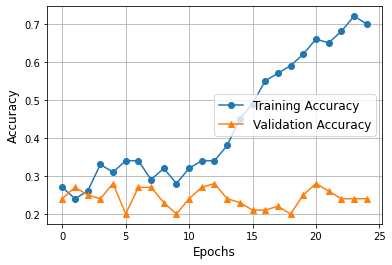

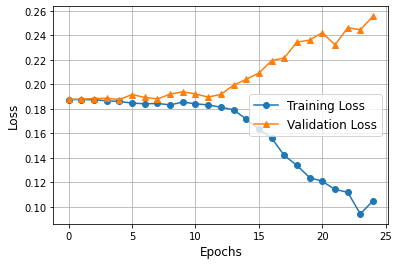

In [31]:
test_X_r = []
test_y_r = []
for i in range(len(test_X)):
    test_X_r.append(np.random.randint(0,2,128))
    test_y_r.append(np.eye(diff_class)[np.random.randint(0,diff_class)])

test_X_r = torch.tensor(test_X_r)
test_y_r = torch.tensor(test_y_r)

# randomly selecting 
random_test = np.random.randint(0,2)
random_test = 1
if (random_test):
    X, y = test_X, test_y
else:
    X, y = test_X_r, test_y_r

with torch.no_grad():
    outputs = net(X.view(-1,128).to(device).float())
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y.to(device))]
    val_acc = matches.count(True)/len(matches)
    # val_acc, val_loss = fwd_pass(X.view(-1,64).to(device),y.to(device))

if (acc-val_acc <= tol):
    pred = 1
else:
    pred = 0

#print(f'Round reduced PRESENT to {rounds} rounds...')
print(f'Number of difference classes used: {diff_class}')
#print(f'PRESENT CIPHER = 1 | RANDOM = 0')
print(f'Used dataset: {random_test} | Predicted dataset: {pred}')
print(f'Acc: {round(float(acc),4)} | Val_acc: {round(float(val_acc),4)}')
if (pred == random_test):
    print('Success!')
else:
    print('Failure!')

print(f'\n\n\n\n')


import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

def create_acc_loss_graph(model_name):
    contents = open(f"GIFT_round=6_random_baski.log","r").read().split('\n')
    
    epochs = []
    accuracies = []
    losses = []
    
    val_accs = []
    val_losses = []
    
    for c in contents:
        if model_name in c:
            name, epoch, acc, loss, val_acc, val_loss = c.split(",")
            
            epochs.append(float(epoch))
            accuracies.append(float(acc))
            losses.append(float(loss))
            
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))
            
    fig = plt.figure()
    
    # ax1 = plt.subplot2grid((1,2), (0,0))
    # ax2 = plt.subplot2grid((1,2), (0,1), sharex = ax1)
    
    plt.plot(epochs, accuracies, '-o', label = "Training Accuracy")
    plt.plot(epochs, val_accs, '-^', label = "Validation Accuracy")
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epochs', fontsize=12)
    plt.legend(loc=5, prop={'size': 12})
    plt.grid()

    plt.savefig(f'Acc3_r={6}_c={diff_class}.png', dpi=360)

    fig = plt.figure()
    
    plt.plot(epochs, losses, '-o', label = "Training Loss")
    plt.plot(epochs, val_losses, '-^', label = "Validation Loss")
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epochs', fontsize=12)
    plt.legend(loc=5, prop={'size': 12})
    plt.grid()

    plt.savefig(f'Loss3_r={6}_c={diff_class}.png', dpi=360)
    
    plt.show()

# model_name = "PRESENT-1585941094"
model_name = MODEL_NAME

create_acc_loss_graph(model_name)

#**Model 4 --> Random + Our**#

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on GPU")
else :
    device = torch.device("cpu")
    print("running on CPU")

# NN class
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(128,128)
        self.l2 = nn.Linear(128,1024)
        
        self.f1 = nn.Linear(1024,diff_class)
    
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        

        x = self.f1(x)
        
        return F.softmax(x, dim=1)
    
net = Net().to(device)

# NN parameters
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

# converting dataset to tensors
X = torch.Tensor(ciphers1)
y = torch.Tensor([np.eye(diff_class)[enc_class1[i]] for i in range(len(enc_class1))])

VAL_PCT = 0.3
val_size = int(len(X)*VAL_PCT)
# print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

# defining what to do in one iteration of data tensor throught the NN
def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs,y)
    
    if train:
        loss.backward()
        optimizer.step()
    
    return acc, loss


MODEL_NAME = f"GIFT_ML-Differential"

net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def test(size=32):
    
    random_start = np.random.randint(len(test_X)-size)
    X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,128).to(device),y.to(device))
    return val_acc, val_loss

# defining training method
def train():
    BATCH_SIZE = 200
    EPOCHS = 25
    with open(f"GIFT_round=4_random_our.log","w") as f:
        for epoch in progressbar.progressbar(range(EPOCHS)):
            for i in range(0,len(train_X), BATCH_SIZE):

                batch_X = train_X[i:i+BATCH_SIZE].view(-1,128).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)
                
                acc, loss = fwd_pass(batch_X, batch_y, train=True)
            
            if epoch%1 == 0:
                # Validating model
                random_start = np.random.randint(len(test_X)-BATCH_SIZE)
                X, y = test_X[random_start:random_start+BATCH_SIZE], test_y[random_start:random_start+BATCH_SIZE]
                with torch.no_grad():
                    val_acc, val_loss = fwd_pass(X.view(-1,128).to(device),y.to(device))

                # writing log file
                f.write(f"{MODEL_NAME},{epoch},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")
                
                print(f" Acc: {round(float(acc),2)}\t Loss: {round(float(loss),4)}\t Val_Acc: {round(float(val_acc),2)}\t Val_Loss: {round(float(val_loss),4)}")
    
    return val_acc

acc = train()
tol = 0.2/diff_class
# checking for adequate accuracy

running on CPU


N/A% (0 of 25) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

GIFT_ML-Differential


  4% (1 of 25) |#                        | Elapsed Time: 0:00:01 ETA:   0:00:36

 Acc: 0.29	 Loss: 0.1872	 Val_Acc: 0.28	 Val_Loss: 0.187


  8% (2 of 25) |##                       | Elapsed Time: 0:00:03 ETA:   0:00:34

 Acc: 0.27	 Loss: 0.187	 Val_Acc: 0.28	 Val_Loss: 0.1867


 12% (3 of 25) |###                      | Elapsed Time: 0:00:04 ETA:   0:00:33

 Acc: 0.3	 Loss: 0.1842	 Val_Acc: 0.26	 Val_Loss: 0.187


 16% (4 of 25) |####                     | Elapsed Time: 0:00:06 ETA:   0:00:31

 Acc: 0.38	 Loss: 0.1804	 Val_Acc: 0.33	 Val_Loss: 0.1874


 20% (5 of 25) |#####                    | Elapsed Time: 0:00:07 ETA:   0:00:30

 Acc: 0.41	 Loss: 0.1737	 Val_Acc: 0.33	 Val_Loss: 0.1855


 24% (6 of 25) |######                   | Elapsed Time: 0:00:09 ETA:   0:00:28

 Acc: 0.42	 Loss: 0.1686	 Val_Acc: 0.26	 Val_Loss: 0.1948


 28% (7 of 25) |#######                  | Elapsed Time: 0:00:10 ETA:   0:00:27

 Acc: 0.46	 Loss: 0.1645	 Val_Acc: 0.23	 Val_Loss: 0.1941


 32% (8 of 25) |########                 | Elapsed Time: 0:00:11 ETA:   0:00:24

 Acc: 0.46	 Loss: 0.1626	 Val_Acc: 0.28	 Val_Loss: 0.1945


 36% (9 of 25) |#########                | Elapsed Time: 0:00:13 ETA:   0:00:22

 Acc: 0.5	 Loss: 0.1623	 Val_Acc: 0.26	 Val_Loss: 0.2053


 40% (10 of 25) |#########               | Elapsed Time: 0:00:14 ETA:   0:00:22

 Acc: 0.51	 Loss: 0.161	 Val_Acc: 0.35	 Val_Loss: 0.1956


 44% (11 of 25) |##########              | Elapsed Time: 0:00:16 ETA:   0:00:21

 Acc: 0.58	 Loss: 0.1486	 Val_Acc: 0.29	 Val_Loss: 0.2037


 48% (12 of 25) |###########             | Elapsed Time: 0:00:18 ETA:   0:00:19

 Acc: 0.61	 Loss: 0.1428	 Val_Acc: 0.3	 Val_Loss: 0.2087


 52% (13 of 25) |############            | Elapsed Time: 0:00:19 ETA:   0:00:18

 Acc: 0.63	 Loss: 0.1385	 Val_Acc: 0.27	 Val_Loss: 0.2163


 56% (14 of 25) |#############           | Elapsed Time: 0:00:21 ETA:   0:00:16

 Acc: 0.64	 Loss: 0.1307	 Val_Acc: 0.31	 Val_Loss: 0.2075


 60% (15 of 25) |##############          | Elapsed Time: 0:00:22 ETA:   0:00:15

 Acc: 0.63	 Loss: 0.1294	 Val_Acc: 0.26	 Val_Loss: 0.2155


 64% (16 of 25) |###############         | Elapsed Time: 0:00:24 ETA:   0:00:13

 Acc: 0.64	 Loss: 0.1294	 Val_Acc: 0.27	 Val_Loss: 0.23


 68% (17 of 25) |################        | Elapsed Time: 0:00:25 ETA:   0:00:12

 Acc: 0.67	 Loss: 0.119	 Val_Acc: 0.32	 Val_Loss: 0.2148


 72% (18 of 25) |#################       | Elapsed Time: 0:00:27 ETA:   0:00:10

 Acc: 0.67	 Loss: 0.1163	 Val_Acc: 0.3	 Val_Loss: 0.2235


 76% (19 of 25) |##################      | Elapsed Time: 0:00:28 ETA:   0:00:09

 Acc: 0.61	 Loss: 0.1249	 Val_Acc: 0.28	 Val_Loss: 0.2365


 80% (20 of 25) |###################     | Elapsed Time: 0:00:30 ETA:   0:00:07

 Acc: 0.68	 Loss: 0.1106	 Val_Acc: 0.3	 Val_Loss: 0.2307


 84% (21 of 25) |####################    | Elapsed Time: 0:00:31 ETA:   0:00:06

 Acc: 0.74	 Loss: 0.1006	 Val_Acc: 0.24	 Val_Loss: 0.2503


 88% (22 of 25) |#####################   | Elapsed Time: 0:00:33 ETA:   0:00:04

 Acc: 0.78	 Loss: 0.0948	 Val_Acc: 0.31	 Val_Loss: 0.2267


 92% (23 of 25) |######################  | Elapsed Time: 0:00:34 ETA:   0:00:03

 Acc: 0.74	 Loss: 0.0976	 Val_Acc: 0.33	 Val_Loss: 0.2295


 96% (24 of 25) |####################### | Elapsed Time: 0:00:36 ETA:   0:00:01

 Acc: 0.72	 Loss: 0.102	 Val_Acc: 0.3	 Val_Loss: 0.228


100% (25 of 25) |########################| Elapsed Time: 0:00:38 Time:  0:00:38


 Acc: 0.81	 Loss: 0.0882	 Val_Acc: 0.28	 Val_Loss: 0.2394


Number of difference classes used: 4
Used dataset: 1 | Predicted dataset: 1
Acc: 0.28 | Val_acc: 0.2948
Success!







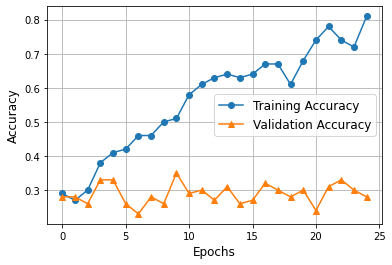

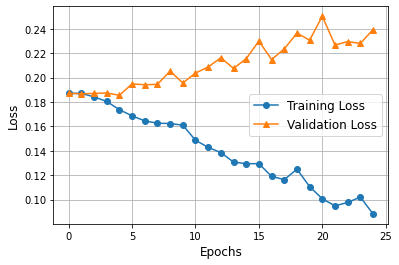

In [31]:
test_X_r = []
test_y_r = []
for i in range(len(test_X)):
    test_X_r.append(np.random.randint(0,2,128))
    test_y_r.append(np.eye(diff_class)[np.random.randint(0,diff_class)])

test_X_r = torch.tensor(test_X_r)
test_y_r = torch.tensor(test_y_r)

# randomly selecting 
random_test = np.random.randint(0,2)
random_test = 1
if (random_test):
    X, y = test_X, test_y
else:
    X, y = test_X_r, test_y_r

with torch.no_grad():
    outputs = net(X.view(-1,128).to(device).float())
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y.to(device))]
    val_acc = matches.count(True)/len(matches)
    # val_acc, val_loss = fwd_pass(X.view(-1,64).to(device),y.to(device))

if (acc-val_acc <= tol):
    pred = 1
else:
    pred = 0

#print(f'Round reduced PRESENT to {rounds} rounds...')
print(f'Number of difference classes used: {diff_class}')
#print(f'PRESENT CIPHER = 1 | RANDOM = 0')
print(f'Used dataset: {random_test} | Predicted dataset: {pred}')
print(f'Acc: {round(float(acc),4)} | Val_acc: {round(float(val_acc),4)}')
if (pred == random_test):
    print('Success!')
else:
    print('Failure!')

print(f'\n\n\n\n')


import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

def create_acc_loss_graph(model_name):
    contents = open(f"GIFT_round=4_random_our.log","r").read().split('\n')
    
    epochs = []
    accuracies = []
    losses = []
    
    val_accs = []
    val_losses = []
    
    for c in contents:
        if model_name in c:
            name, epoch, acc, loss, val_acc, val_loss = c.split(",")
            
            epochs.append(float(epoch))
            accuracies.append(float(acc))
            losses.append(float(loss))
            
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))
            
    fig = plt.figure()
    
    # ax1 = plt.subplot2grid((1,2), (0,0))
    # ax2 = plt.subplot2grid((1,2), (0,1), sharex = ax1)
    
    plt.plot(epochs, accuracies, '-o', label = "Training Accuracy")
    plt.plot(epochs, val_accs, '-^', label = "Validation Accuracy")
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epochs', fontsize=12)
    plt.legend(loc=5, prop={'size': 12})
    plt.grid()

    plt.savefig(f'Acc4_r={4}_c={diff_class}.png', dpi=360)

    fig = plt.figure()
    
    plt.plot(epochs, losses, '-o', label = "Training Loss")
    plt.plot(epochs, val_losses, '-^', label = "Validation Loss")
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epochs', fontsize=12)
    plt.legend(loc=5, prop={'size': 12})
    plt.grid()

    plt.savefig(f'Loss4_r={4}_c={diff_class}.png', dpi=360)
    
    plt.show()

# model_name = "PRESENT-1585941094"
model_name = MODEL_NAME

create_acc_loss_graph(model_name)

#**Comapring the models**#

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


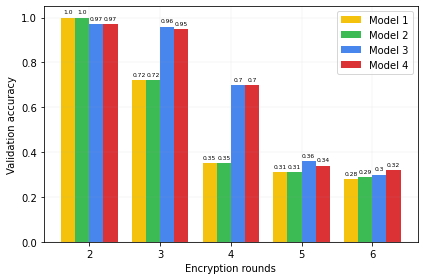

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


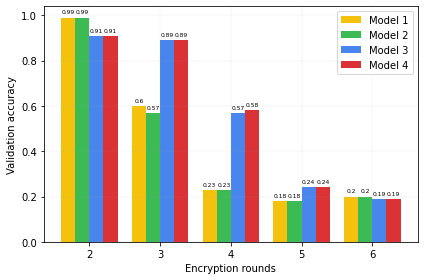

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


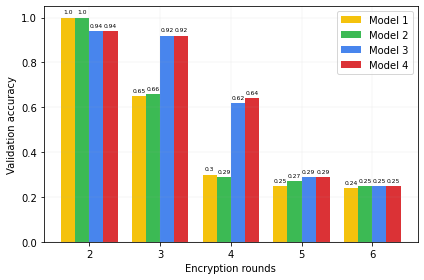

In [9]:
import os
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from progressbar import progressbar

%matplotlib inline

def get_data(model_name, rounds, graph):
    contents_wang = open(f"/content/GIFT_round={rounds}_wang_baski.log","r").read().split('\n')
    contents_random = open(f"/content/GIFT_round={rounds}_random_baski.log","r").read().split('\n')
    contents_wang_our = open(f"/content/GIFT_round={rounds}_wang_our.log","r").read().split('\n')
    contents_random_our = open(f"/content/GIFT_round={rounds}_random_our.log","r").read().split('\n')
   
    epochs = []
    
    val_accs_wang = []
    val_accs_random = []
    val_accs_wang_our = []
    val_accs_random_our = []
    
    for c in range(len(contents_wang)-1):
        name, epoch, acc, loss, val_acc, val_loss = contents_wang[c].split(",")
            
        epochs.append(float(epoch))
        val_accs_wang.append(float(val_acc))

    for c in range(len(contents_random)-1):
        name, epoch, acc, loss, val_acc, val_loss = contents_random[c].split(",")
            
        val_accs_random.append(float(val_acc))

    for c in range(len(contents_wang_our)-1):
        name, epoch, acc, loss, val_acc, val_loss = contents_wang_our[c].split(",")

        val_accs_wang_our.append(float(val_acc))

    for c in range(len(contents_random_our)-1):
        name, epoch, acc, loss, val_acc, val_loss = contents_random_our[c].split(",")
            
        val_accs_random_our.append(float(val_acc))

    if (graph == 'max'):
        return max(val_accs_wang), max(val_accs_random), max(val_accs_wang_our), max(val_accs_random_our)
    if (graph == 'min'):
        return min(val_accs_wang), min(val_accs_random), min(val_accs_wang_our), min(val_accs_random_our)
    if (graph == 'avg'):
        return round(sum(val_accs_wang)/len(epochs),2), round(sum(val_accs_random)/len(epochs),2), round(sum(val_accs_wang_our)/len(epochs),2), round(sum(val_accs_random_our)/len(epochs),2)

def create_comp_graph(graph):

    val_accs_wang = []
    val_accs_random = []
    val_accs_wang_our = []
    val_accs_random_our = []
    # present_rounds = range(3,7)
    rounds = range(2,7)

    model_name = "GIFT_ML-Differential"
    # model_name = MODEL_NAME
    diff_class = 4
    for round in progressbar(rounds):
        v_w, v_r, v_w_o, v_r_o = get_data(model_name, round,graph)
        val_accs_wang.append(v_w)
        val_accs_random.append(v_r)
        val_accs_wang_our.append(v_w_o)
        val_accs_random_our.append(v_r_o)

    x = np.arange(len(rounds))  # the label locations
    width = 0.2  # the width of the bars

    # fig, ax = plt.subplots(figsize=(9, 4.5))
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 3*width/2, val_accs_random, width, label="Model 1", color='#f4c20d')
    rects2 = ax.bar(x - width/2, val_accs_random_our, width, label="Model 2", color='#3cba54')
    rects3 = ax.bar(x + width/2, val_accs_wang, width, label="Model 3", color='#4885ed')
    rects4 = ax.bar(x + 3*width/2, val_accs_wang_our, width, label="Model 4", color='#db3236')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Validation accuracy')
    ax.set_xlabel('Encryption rounds')
    ax.set_xticks(x)
    ax.set_xticklabels(rounds)
    ax.legend()
    # ax.legend(bbox_to_anchor=(0.6, 1.0), loc='upper left', prop={'size':12})



    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=6)


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()
    plt.grid(linewidth=0.1)

    plt.savefig(f'Bar_graph_gift_{graph}.png', dpi=360)
    plt.show()

create_comp_graph('max')
create_comp_graph('min')
create_comp_graph('avg')

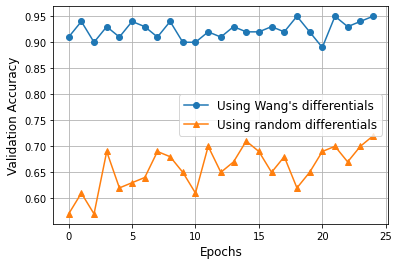

In [24]:
def create_comp_graph(model_name):
    contents_wang = open(f"GIFT_round={3}_wang_our.log","r").read().split('\n')
    contents_random = open(f"GIFT_round={3}_random_our.log","r").read().split('\n')
    
    epochs = []
    
    val_accs_wang = []
    val_accs_random = []
    
    for c in range(len(contents_wang)-1):
        name, epoch, acc, loss, val_acc, val_loss = contents_wang[c].split(",")
            
        epochs.append(float(epoch))
        val_accs_wang.append(float(val_acc))

    for c in range(len(contents_random)-1):
        name, epoch, acc, loss, val_acc, val_loss = contents_random[c].split(",")
            
        val_accs_random.append(float(val_acc))
            
    fig = plt.figure()
    
    # ax1 = plt.subplot2grid((1,2), (0,0))
    # ax2 = plt.subplot2grid((1,2), (0,1), sharex = ax1)
    
    plt.plot(epochs, val_accs_wang, '-o', label = "Using Wang's differentials")
    plt.plot(epochs, val_accs_random, '-^', label = "Using random differentials")
    plt.ylabel('Validation Accuracy', fontsize=12)
    plt.xlabel('Epochs', fontsize=12)
    plt.legend(loc=5, prop={'size': 12})
    plt.grid()

    plt.savefig(f'Comp_graph_Acc_our_r={3}_c={4}.png', dpi=360)

    plt.show()

# model_name = "PRESENT-1585941094"
model_name = "GIFT_ML-Differential"

create_comp_graph(model_name)